# **1. Install packages**

In [209]:
!pip install -U scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [210]:
!pip install seaborn==0.11.0

Defaulting to user installation because normal site-packages is not writeable


In [211]:
!pip install -q ptitprince

# **2. Load libraries**

In [213]:
# Data manipulation
#====================================================
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# Data visualization
#====================================================
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
import ptitprince as pt
import matplotlib.animation as animation
from IPython.display import HTML
from mlxtend.plotting import (plot_confusion_matrix,
                              plot_decision_regions)

# Data preprocessing
#======================================================
from sklearn.model_selection import train_test_split

# Stats
#======================================================
from scipy import stats
from sklearn.decomposition import PCA

# Models
#=====================================================
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (RandomForestClassifier, 
                              ExtraTreesClassifier, 
                              GradientBoostingClassifier,
                              HistGradientBoostingClassifier)


# Metrics
#=============================================================
from sklearn.metrics import (brier_score_loss, 
                             confusion_matrix)

# Others
#============================================================
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

# **3. Load data**

In [214]:
data = pd.read_csv("PPG_Dataset.csv")
data.head()

0         1         2         3         4         5         6  \
0 -0.015552  0.016963  0.013575  0.027204  0.068154  0.129259  0.127915   
1  0.002323  0.002754  0.022539  0.228807  0.107751  0.034439  0.086007   
2  0.050481 -0.339781  0.265111  0.045092  0.040086  0.087173  0.092814   
3  0.023882  0.016561  0.248547  0.054567  0.128032  0.085954  0.107359   
4 -0.058591  0.171551  0.057262  0.270869  0.138357  0.078509  0.062504   

          7         8         9        10        11        12        13  \
0  0.345174  0.197811  0.167651  0.188008  0.210002  0.300249  0.286878   
1  0.155667  0.163327  0.223759  0.194284  0.164626  0.288272  0.257784   
2  0.099586 -0.143305  0.164186  0.183051  0.260209  0.218494  0.240157   
3  0.207137  0.174547 -0.100118  0.198192  0.224698  0.228772  0.266937   
4  0.104447  0.134795  0.194248  0.207772 -0.082397  0.251317  0.254981   

         14        15        16        17        18        19        20  \
0  0.245484  0.251055  0.255955  0.278846  0.308022  0.343760  0.434469   
1  0.283570  0.233321  0.274143  0.338321  0.351918  0.343035  0.027693   
2  0.278373  0.289114  0.301681  0.294058  0.309652  0.067248  0.599566   
3  0.207305  0.281607  0.302056  0.299339  0.341836  0.356384  0.400386   
4  0.197805  0.254912  0.314765  0.299708  0.017564  0.331773  0.324431   

         21        22        23        24        25        26        27  \
0  0.428208  0.437563  0.415406  0.599891  0.449555  0.464310  0.381474   
1  0.388664  0.408249  0.433351  0.452315  0.126454  0.488282  0.503048   
2  0.328368  0.382880  0.439340  0.391727  0.439180  0.466807  0.444102   
3  0.397095  0.388836  0.441653  0.589049  0.428259  0.453122  0.629774   
4  0.403574  0.420414  0.138509  0.387050  0.457892  0.185465  0.464022   

         28        29        30        31        32        33        34  \
0  0.457721  0.443431  0.590281  0.553590  0.507868  0.554312  0.505314   
1  0.447426  0.413005  0.490947  0.497209  0.206440  0.520280  0.544534   
2  0.466486  0.474236  0.509398  0.211861  0.516359  0.506746  0.485962   
3  0.526196  0.500197  0.460409  0.501877  0.511250  0.513360  0.525224   
4  0.668756  0.521367  0.496837  0.480503  0.195324  0.515800  0.546785   

         35        36        37        38        39        40        41  \
0  0.595941  0.582172  0.576531  0.571459  0.568927  0.604908  0.574828   
1  0.524846  0.566077  0.542778  0.616055  0.576397  0.593718  0.795990   
2  0.247258  0.521063  0.567689  0.599022  0.554992  0.583085  0.589728   
3  0.737890  0.545308  0.538864  0.549445  0.534572  0.551992  0.815156   
4  0.513597  0.537314  0.569383  0.579037  0.551766  0.588116  0.543599   

         42        43        44        45        46        47        48  \
0  0.529666  0.586885  0.310780  0.657003  0.597967  0.628679  0.527802   
1  0.625698  0.582278  0.584454  0.607578  0.600004  0.623034  0.802244   
2  0.621353  0.588286  0.614078  0.548541  0.592965  0.785028  0.655668   
3  0.552739  0.623711  0.565520  0.594959  0.602034  0.578790  0.597345   
4  0.592238  0.310656  0.621957  0.631990  0.594209  0.620361  0.580267   

         49        50        51        52        53        54        55  \
0  0.533926  0.272788  0.589535  0.545185  0.577979  0.636878  0.569923   
1  0.590526  0.542253  0.607141  0.609479  0.646525  0.575159  0.600482   
2  0.596075  0.548949  0.589180  0.564268  0.586807  0.590651  0.603219   
3  0.637979  0.592856  0.580855  0.549104  0.300668  0.589731  0.586029   
4  0.600507  0.605777  0.553957  0.599820  0.796420  0.552221  0.590917   

         56        57        58        59        60        61        62  \
0  0.602043  0.587058  0.583060  0.559785  0.540157  0.516897  0.506381   
1  0.585732  0.551969  0.759050  0.606422  0.581621  0.529942  0.596178   
2  0.601251  0.551553  0.643434  0.560202  0.563537  0.536643  0.558887   
3  0.596460  0.519941  0.599436  0.558806  0.533801  0.568865  0.528056   
4  0.532387  0.575688  0.58

# **4. EDA**

In [216]:
print(f'Data set: {data.shape[0]} rows and {data.shape[1]} columns')

Data set: 2576 rows and 2001 columns


In [218]:
SEED = 1234

data_train, data_rest = train_test_split(data,
                                         test_size = 0.2,
                                         random_state = SEED,
                                         stratify = data['Label'])

data_valid, data_test = train_test_split(data_rest,
                                         test_size = 0.5,
                                         random_state = SEED,
                                         stratify = data_rest['Label'])

print(f"Data Train: {data_train.shape[0]}")
print(f"Data Valid: {data_valid.shape[0]}")
print(f"Data Test: {data_test.shape[0]}")

Data Train: 2060
Data Valid: 258
Data Test: 258


In [219]:
data_eda = data_train.copy()
data_eda.head()

0         1         2         3         4         5         6  \
2027 -0.038323 -0.005829  0.037988  0.073419 -0.211057  0.119299  0.106011   
1318 -0.018195  0.013671 -0.008085  0.279214  0.057812  0.073066  0.133292   
2072  0.038897  0.031398  0.057650  0.008909  0.086232  0.101131  0.137262   
1244 -0.305392  0.022954  0.132727  0.020413  0.082802  0.131305  0.123307   
194   0.002558  0.022589  0.023819  0.063610  0.031278  0.102436  0.115646   

             7         8         9        10        11        12        13  \
2027  0.137698  0.137966  0.166185  0.179034  0.259531  0.193475  0.247111   
1318  0.132823  0.168937  0.104579  0.211659  0.232839  0.263037  0.289595   
2072  0.119156  0.226606  0.213552  0.245106  0.238724  0.208823  0.256817   
1244  0.145812  0.157085  0.216381  0.223536  0.217569  0.232153  0.209239   
194   0.165199  0.183746  0.150827  0.207979  0.204687  0.206000  0.240987   

            14        15        16        17        18        19        20  \
2027  0.216333  0.261317  0.333093  0.286949  0.268423  0.371332  0.355032   
1318  0.283830  0.301378  0.332059  0.277249  0.313466  0.377998  0.371358   
2072  0.252424  0.404316  0.314144  0.327174  0.337022  0.572485  0.374379   
1244  0.264363  0.332724  0.333007  0.275254  0.280454  0.339529  0.581219   
194   0.210788  0.252424  0.295984  0.326749  0.367055  0.392735  0.349095   

            21        22        23        24        25        26        27  \
2027  0.407515  0.415157  0.392498  0.383423  0.470222  0.452859  0.426583   
1318  0.426817  0.370084  0.403730  0.447330  0.429405  0.360653  0.417128   
2072  0.363528  0.414691  0.354151  0.465329  0.438134  0.463330  0.460879   
1244  0.366991  0.358442  0.437839  0.402003  0.457711  0.401691  0.234435   
194   0.383886  0.385786  0.418848  0.390267  0.426967  0.435996  0.467007   

            28        29        30        31        32        33        34  \
2027  0.544877  0.550296  0.544511  0.515118  0.580741  0.520306  0.752759   
1318  0.449806  0.492330  0.443434  0.503519  0.535420  0.570007  0.519157   
2072  0.455629  0.751239  0.504748  0.477715  0.550673  0.526908  0.486939   
1244  0.462087  0.191526  0.404362  0.549706  0.512807  0.545020  0.768798   
194   0.452654  0.468295  0.517226  0.506559  0.528260  0.518443  0.504076   

            35        36        37        38        39        40        41  \
2027  0.523382  0.518081  0.591637  0.544081  0.595488  0.793434  0.595732   
1318  0.593611  0.551177  0.575767  0.280563  0.605460  0.556911  0.598535   
2072  0.543636  0.527218  0.736497  0.573737  0.518614  0.563734  0.611271   
1244  0.539222  0.517812  0.516965  0.598624  0.538827  0.551402  0.593683   
194   0.522249  0.553995  0.612660  0.599926  0.554221  0.579795  0.607143   

            42        43        44        45        46        47        48  \
2027  0.578527  0.608100  0.649522  0.641577  0.658814  0.636651  0.566740   
1318  0.529933  0.597309  0.591765  0.583489  0.568322  0.826544  0.588057   
2072  0.659043  0.821767  0.275147  0.551931  0.560720  0.611267  0.616633   
1244  0.568461  0.552555  0.581260  0.609169  0.610256  0.609917  0.659053   
194   0.586958  0.601142  0.601819  0.593453  0.617189  0.589745  0.622511   

            49        50        51        52        53        54        55  \
2027  0.609102  0.567012  0.549147  0.595680  0.598565  0.629558  0.557931   
1318  0.580591  0.265366  0.619620  0.615852  0.576666  0.559645  0.631141   
2072  0.633890  0.562524  0.574641  0.608186  0.791565  0.551539  0.569572   
1244  0.639652  0.624591  0.787590  0.307058  0.623648  0.575378  0.575868   
194   0.568169  0.572846  0.620353  0.609082  0.593553  0.605724  0.589950   

            56        57        58        59        60        61        62  \
2027  0.543702  0.548869  0.600330  0.549281  0.546985  0.524842  0.584568   
1318  0.599193  0.553378  0.601692  0.583346  0.500930  0.530744  0.499430   
2072  0.602742  0.723267  0

# **5. Data preprocessing**

In [220]:
X_train, y_train = data_train.drop(columns = 'Label'), data_train['Label']
X_valid, y_valid = data_valid.drop(columns = 'Label'), data_valid['Label']
X_test, y_test = data_test.drop(columns = 'Label'), data_test['Label']

In [221]:
pca = PCA(n_components = 1, random_state = SEED)
X_train_pca = pca.fit_transform(X_train)
X_valid_pca = pca.transform(X_valid)
X_test_pca = pca.transform(X_test)

In [222]:
binary_encoder = {'Normal':0., 'MI':1.}
y_train_encoder = y_train.map(binary_encoder)
y_valid_encoder = y_valid.map(binary_encoder)
y_test_encoder = y_test.map(binary_encoder)

In [223]:
print(Counter(y_train_encoder))
print(Counter(y_valid_encoder))
print(Counter(y_test_encoder))

Counter({1.0: 1035, 0.0: 1025})
Counter({1.0: 130, 0.0: 128})
Counter({1.0: 129, 0.0: 129})


# **6. Models**

**The best model is Logistic Regression**

In [224]:
model = LogisticRegression(random_state = SEED, n_jobs = -1)
model.fit(X_train_pca, y_train_encoder.values)

y_pred_proba_test = model.predict_proba(X_test_pca)[:,1]
print(f"Brier score Test: {brier_score_loss(y_test_encoder, y_pred_proba_test):.4f}")

Brier score Test: 0.0337


In [225]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred_test = (y_pred_proba_test >= 0.5).astype(int)

# Calculate metrics
accuracy = accuracy_score(y_test_encoder, y_pred_test)
precision = precision_score(y_test_encoder, y_pred_test)
recall = recall_score(y_test_encoder, y_pred_test)
f1 = f1_score(y_test_encoder, y_pred_test)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")


Accuracy: 0.9651
Precision: 0.9688
Recall: 0.9612
F1-score: 0.9650


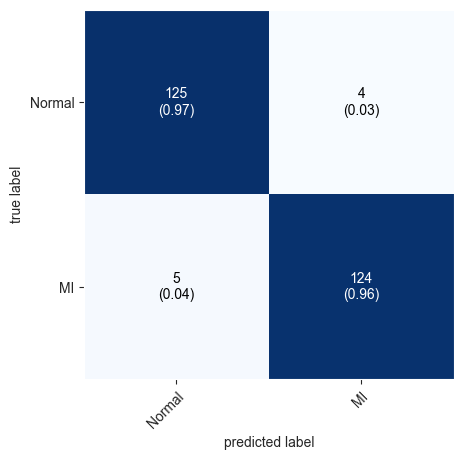

In [226]:
y_pred_test = model.predict(X_test_pca)
cf_mx_test = confusion_matrix(y_test_encoder.values, y_pred_test)

fig, ax = plot_confusion_matrix(conf_mat = cf_mx_test, 
                                show_absolute = True, 
                                show_normed=True, 
                                class_names = ['Normal', 'MI'])
plt.show()

<Axes: >

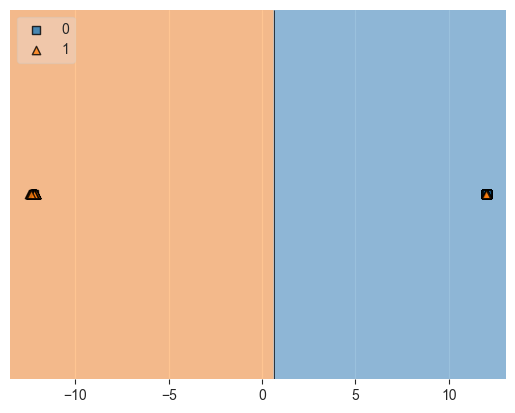

In [227]:
plot_decision_regions(X_valid_pca, y_valid_encoder.astype('int').values, clf=model, legend=2)

In [228]:
X1_test=pd.read_csv("heart_rate_data.csv")
print((X1_test))

          0         1         2         3         4         5         6  \
0 -0.029392 -0.029392 -0.029392 -0.029392 -0.029392 -0.029392 -0.029392   

          7         8         9        10        11        12        13  \
0 -0.029392 -0.029392 -0.029392 -0.029392 -0.029392 -0.029392 -0.029392   

         14        15        16        17        18        19        20  \
0 -0.029392 -0.029392 -0.029392 -0.029392 -0.029392 -0.029392 -0.029392   

         21        22        23        24        25        26        27  \
0 -0.029392 -0.029392 -0.029392 -0.029392 -0.029392 -0.029392 -0.029392   

         28        29        30        31        32        33        34  \
0 -0.029392 -0.029392 -0.029392 -0.029392 -0.029392 -0.029392 -0.029392   

         35        36        37        38        39        40        41  \
0 -0.029392 -0.029392 -0.029392 -0.029392 -0.029392 -0.029392 -0.029392   

         42        43        44        45        46        47        48  \
0 -0.029392 -0.0293

In [229]:
import pandas as pd
X1_test=pd.read_csv("heart_rate_data.csv")

X1_test_pca = pca.transform(X1_test)
y1_pred_proba_test = model.predict_proba(X1_test_pca)
print(y1_pred_proba_test)

[[0.44495699 0.55504301]]


In [230]:
print("Shape of y1_pred_proba_test:", y1_pred_proba_test.shape)
print("Prediction:", y1_pred_proba_test)


Shape of y1_pred_proba_test: (1, 2)
Prediction: [[0.44495699 0.55504301]]


In [231]:
print(y1_pred_proba_test[0][1])

0.555043014056555


In [232]:
result=y1_pred_proba_test[0][1]

In [235]:
import serial
import time
import serial.tools.list_ports

class ArduinoLCD:
    def __init__(self, port='COM7', baudrate=115200):
        self.port = port
        self.baudrate = baudrate
        self.arduino = None

    def connect(self):
        try:
            self.arduino = serial.Serial(
                port=self.port,
                baudrate=self.baudrate,
                timeout=1
            )
            time.sleep(2)  # Wait for Arduino to reset
            print(f"Connected to {self.port} at {self.baudrate} baud")
            return True
        except Exception as e:
            print(f"Connection error: {e}")
            return False

    def display_health_status(self, prediction_value):
        """Display health status based on ML prediction"""
        if not self.arduino or not self.arduino.is_open:
            print("Not connected to Arduino")
            return False
        
        try:
            # Determine health status based on prediction
            if prediction_value > 0.7:
                message = "CONSULT DOCTOR!"
            else:
                message = "Status: Normal"
            
            # Send to Arduino
            self.arduino.write(f"{message}\n".encode())
            time.sleep(0.1)
            
            # Wait for acknowledgment
            if self.arduino.in_waiting:
                response = self.arduino.readline().decode().strip()
                print(f"Display updated: {message}")
            return True
            
        except Exception as e:
            print(f"Display error: {e}")
            return False

    def close(self):
        if self.arduino and self.arduino.is_open:
            self.arduino.close()
            print("Connection closed")

def main():
    # Create LCD object
    lcd = ArduinoLCD()
    
    if not lcd.connect():
        print("Failed to connect to Arduino!")
        return
        
    try:
        while True:
            # Simulate ML model prediction (replace with your actual ML model)
            prediction_value = result  # Example prediction > 0.7
            
            # Display health status
            lcd.display_health_status(prediction_value)
            
            # Wait before next update
            time.sleep(2)
            
    except KeyboardInterrupt:
        print("\nProgram terminated by user")
    finally:
        lcd.close()

if __name__ == "__main__":
    main()


Connected to COM7 at 115200 baud
Display error: 'utf-8' codec can't decode byte 0xb0 in position 4: invalid start byte
Display updated: Status: Normal
Display updated: Status: Normal

Program terminated by user
Connection closed
